# Data understanding 
In this notebook we perform multiple analysis to understand the balancement of the dataset with respect of the soft and hard gold labels and the language of the tweets

In [1]:
import pandas as pd
import pathlib
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import AutoTokenizer, AutoModel
from algorithms import *

DATASET_DIR = pathlib.Path('../data')
pd.options.plotting.backend = "matplotlib"

In [2]:
df = pd.read_csv(DATASET_DIR / 'merged_dataset_proc.csv', sep=';', encoding='utf-8')
df['hard_label'] = df['hard_label'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
print(len(df))
df.sample(1)

7958


,id,language,tweet,split,hard_label,NO,MISOGYNY-NON-SEXUAL-VIOLENCE,SEXUAL-VIOLENCE,IDEOLOGICAL-INEQUALITY,STEREOTYPING-DOMINANCE,OBJECTIFICATION
1937,100900,es,@mablanco60 Y niños contagiados acudiendo al C...,TRAIN_ES,[NO],0.666667,0.0,0.0,0.166667,0.333333,0.0


In [5]:
df.drop('hard_label', axis=1).value_counts('MISOGYNY-NON-SEXUAL-VIOLENCE')

MISOGYNY-NON-SEXUAL-VIOLENCE
0.000000    5052
0.166667    1675
0.333333     626
0.500000     304
0.666667     147
0.200000      56
0.833333      52
0.400000      22
1.000000      13
0.600000       9
0.800000       2
Name: count, dtype: int64

## Soft labels analysis
In this plot we can observe the distributions of soft labels, the value on the x-axis corresponds to the proportion of annotators who chose a certain class for each pattern. on the y-axis we have the number of patterns sharing this proportion for each class. 

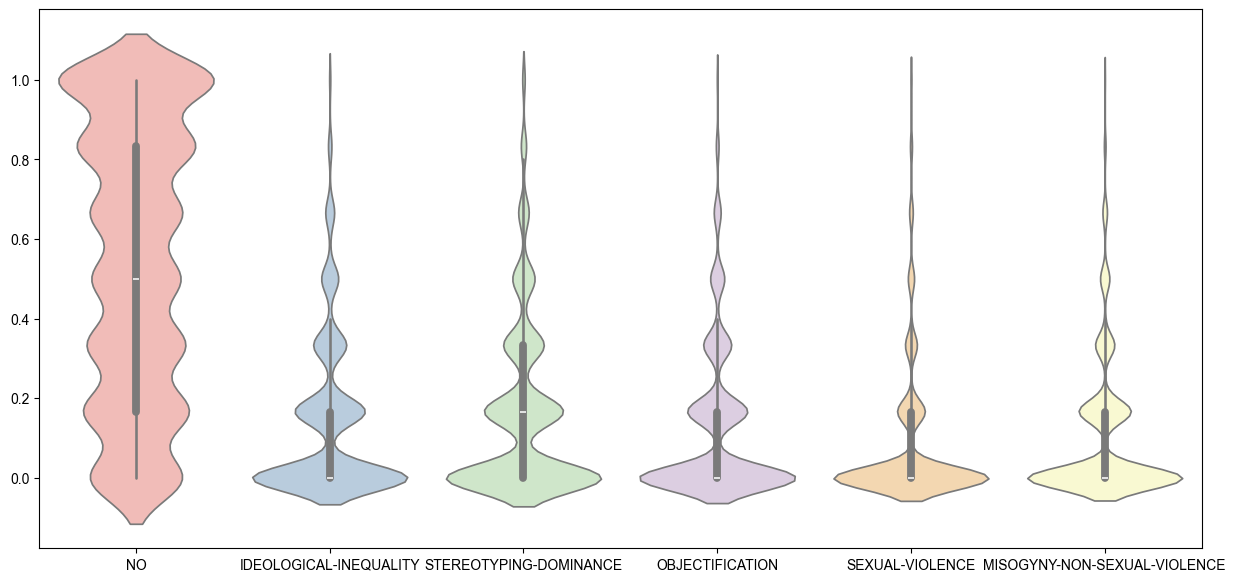

In [6]:
soft_label = ['NO', 'IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMINANCE', 'OBJECTIFICATION', 'SEXUAL-VIOLENCE', 'MISOGYNY-NON-SEXUAL-VIOLENCE']

a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style('whitegrid')
sns.violinplot(ax=ax, data=df[soft_label], palette="Pastel1")

#Add label on the y-axis
ax.set_ylabel("Gold Soft Label Value")
#ax.set_xlabel("Proportion of Annotators")

plt.show()

## Hard label analysis
In this plot, we have counted how many times each class is present in the hard labels (the sum of the values exceeds the total number of patterns as each annotator can choose multiple classes)

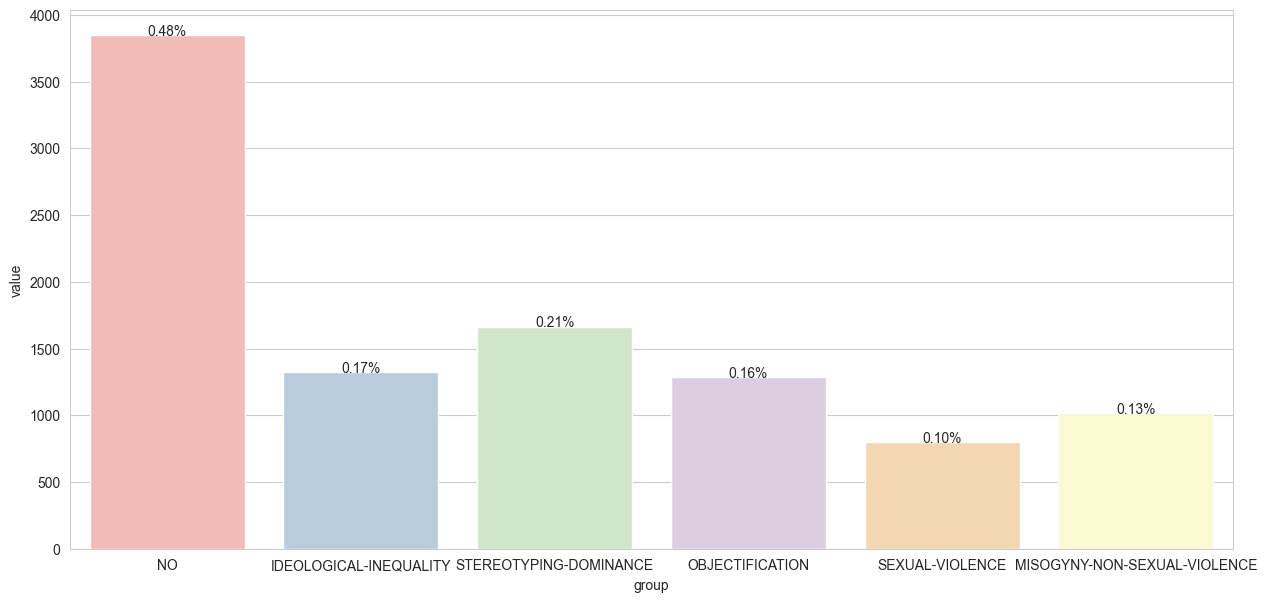

labels: ['NO', 'IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMINANCE', 'OBJECTIFICATION', 'SEXUAL-VIOLENCE', 'MISOGYNY-NON-SEXUAL-VIOLENCE']
values: [0.48328726 0.16649912 0.20909776 0.16159839 0.10027645 0.12741895]


In [7]:
total_tag = list(df.loc[df['hard_label'].notna()]['hard_label'].values)
dummy = []
for x in total_tag:
    dummy += x
total_tag = dummy
soft_label_values = [total_tag.count('NO'), total_tag.count('IDEOLOGICAL-INEQUALITY'), total_tag.count('STEREOTYPING-DOMINANCE'),
            total_tag.count('OBJECTIFICATION'), total_tag.count('SEXUAL-VIOLENCE'), total_tag.count('MISOGYNY-NON-SEXUAL-VIOLENCE')]
soft_label = ['NO', 'IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMINANCE', 'OBJECTIFICATION', 'SEXUAL-VIOLENCE', 'MISOGYNY-NON-SEXUAL-VIOLENCE']
ddf = pd.DataFrame(dict(
    group = soft_label,
    value = soft_label_values))

a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_style('whitegrid')
sns.barplot(data=ddf, y='value', x ='group', ax=ax, palette='Pastel1', hue='group') 
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.2f}%'.format((ddf['value']/len(df)).values[i]), (x, y), ha='center')
plt.show()  

print('labels:', soft_label)
print('values:', np.array(soft_label_values)/len(df))

In the following snippet we show the possible values of the hard labels and how many times they are present in the dataset

In [8]:
df.groupby(df.loc[df['hard_label'].notna()]['hard_label'].map(tuple)).count()['id'].to_frame().sort_values(by='id', ascending=False).head(30).rename({'id':'count'}, axis=1)

,count
hard_label,
"(NO,)",3846
"(IDEOLOGICAL-INEQUALITY,)",309
"(STEREOTYPING-DOMINANCE,)",294
"(IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINANCE)",275
"(OBJECTIFICATION,)",160
"(MISOGYNY-NON-SEXUAL-VIOLENCE,)",155
"(STEREOTYPING-DOMINANCE, OBJECTIFICATION)",152
"(SEXUAL-VIOLENCE,)",144
"(STEREOTYPING-DOMINANCE, IDEOLOGICAL-INEQUALITY)",143


This plot shows the division of the samples in the 2 languages of the dataset

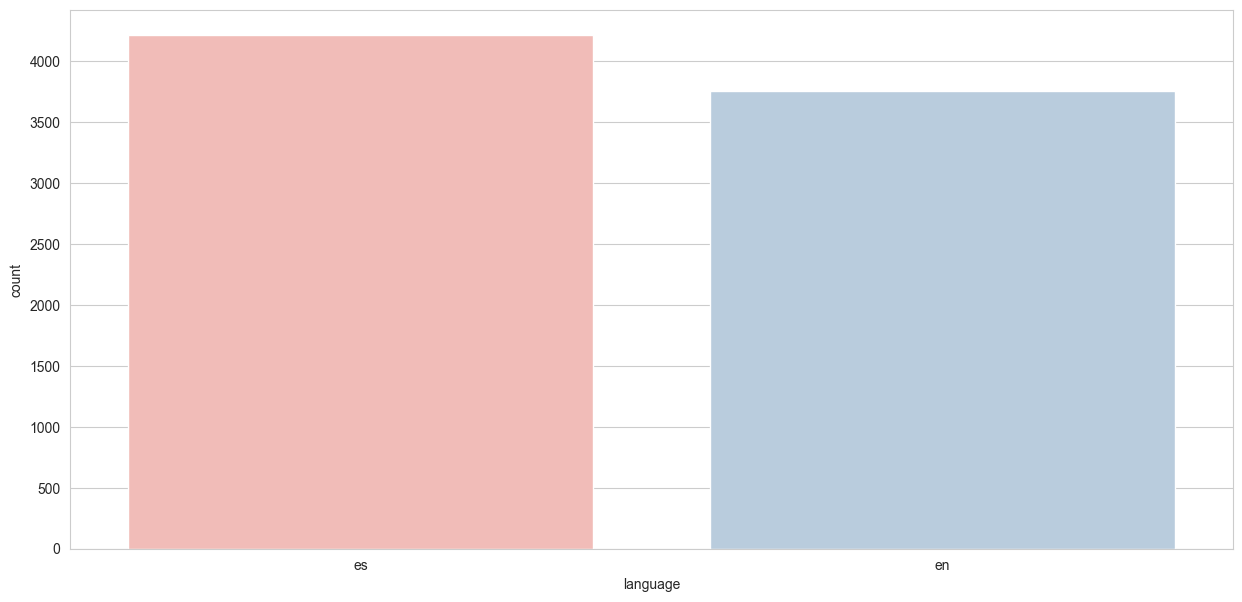

In [9]:
val = df['language'].value_counts().values
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style('whitegrid')
sns.barplot(ax=ax, data=df['language'].value_counts().to_frame(), y='count', x='language', hue='language', palette="Pastel1");

## Tweet analysis

In [10]:
name = "FacebookAI/xlm-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(name)

In the following plot we show the length of each tweet with the processing and without. The blue and red line indicate the maximum value.

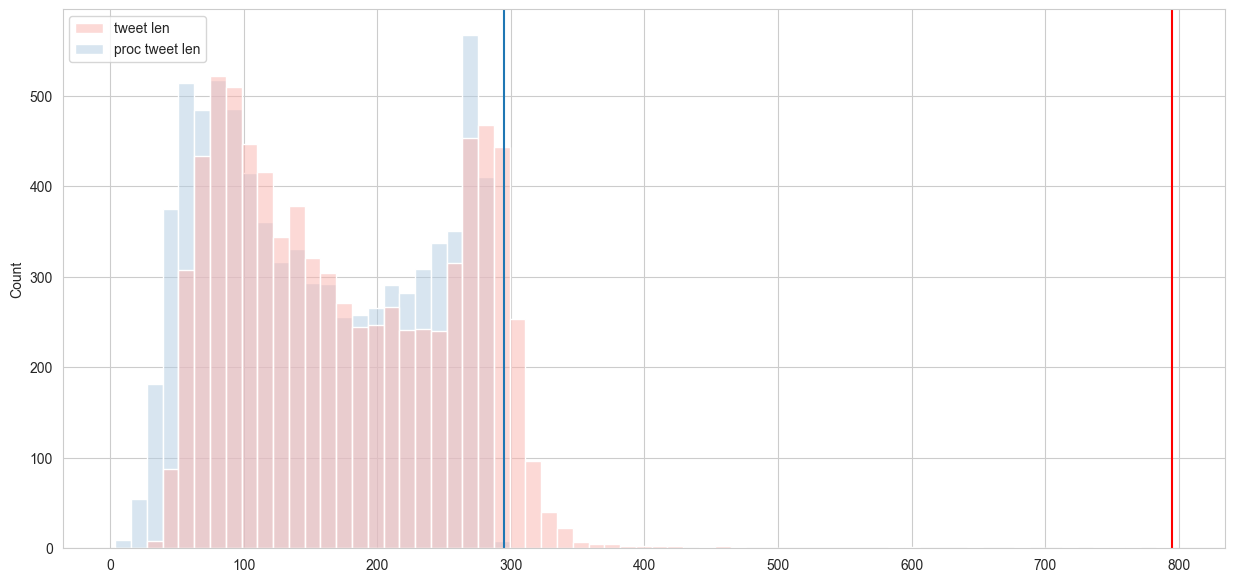

In [11]:

val = []
val_prec = []
lab = []
for t in df['tweet'].values:
    val.append(len(t))
    val_prec.append(len(process_tweet(t)))

test = pd.DataFrame({'tweet len':val, 'proc tweet len':val_prec})
sns.set_style('whitegrid')
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=test, palette='Pastel1')
plt.axvline(test['tweet len'].max(), color='red');
plt.axvline(test['proc tweet len'].max());

Distribution of tokenized input tweet lengths across the entire dataset. Raw tokenized data is shown
in red with a vertical red line indicating the maximum length, while processed tokenized tweets are shown in
blue with a vertical blue line indicating the maximum length.

121 323


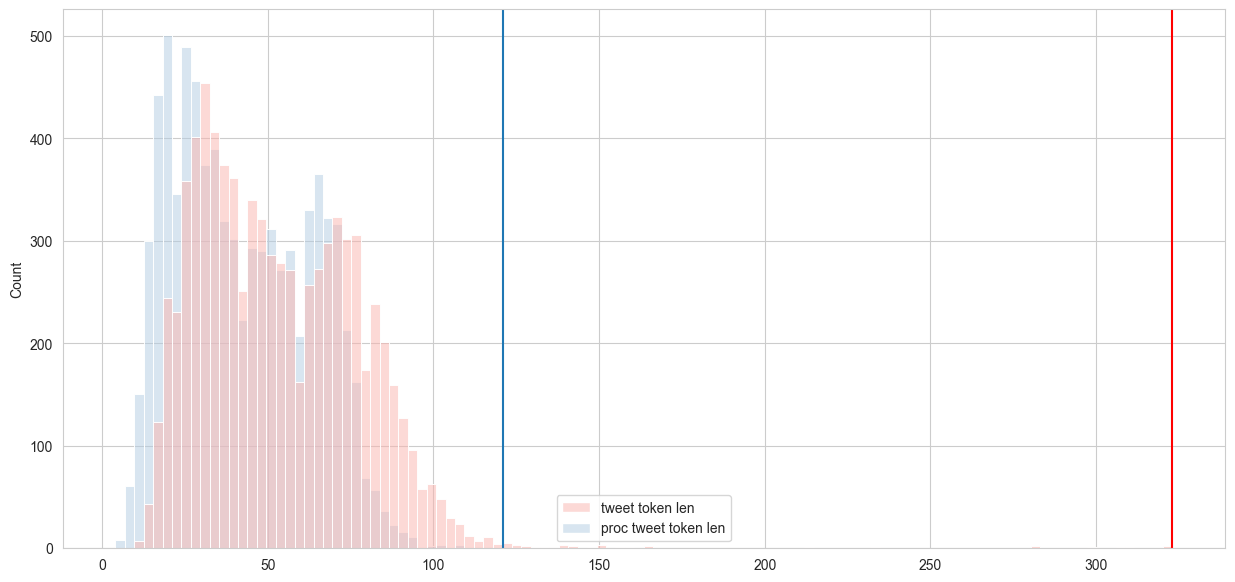

In [12]:
val_tok = []
val_prec_tok = []
lab = []
for t in df['tweet'].values:
    val_tok.append(len(tokenizer.encode(t)))
    val_prec_tok.append(len(tokenize(t, tokenizer)))
    
test = pd.DataFrame({'tweet token len':val_tok, 'proc tweet token len':val_prec_tok})
sns.set_style('whitegrid')
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=test, palette='Pastel1')
plt.axvline(test['proc tweet token len'].max())
plt.axvline(test['tweet token len'].max(), color='red');

print(test['proc tweet token len'].max(), test['tweet token len'].max())